<a href="https://colab.research.google.com/github/GiuliaLanzillotta/exercises/blob/master/Intro_to_quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum machine learning 
Material from EdX course of University of Toronto : [link](https://courses.edx.org/courses/course-v1:University_of_TorontoX+UTQML101x+2T2019/course/) 

**Two quantum computing paradigms**: quantum annealing and gate-model quantum computing.

### <font color='blue'>Frameworks</font>
The gate-model paradigm has many options:
- Rigetti Computing : Forest SDK 
- IBM Q : Qiskit.

With quantum annealing, the de facto choice is the D-Wave Ocean suite.

In [0]:
pip install qiskit-terra[visualization] 

In [0]:
pip install dwave-networkx dimod minorminer qiskit qiskit-aqua

In [0]:
pip install qiskit-ibmq-provider

## <font color='green'> Simulating a coin tossing on a quantum computer</font>


We create a circuit of a single qubit and a single classical register where the results of the sampling (measurements) go.

In [0]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer

In [0]:
backend = BasicAer.get_backend(name="qasm_simulator", hub=None)
# NB: we are SIMULATING the behaviour of a quantum computer

Constructing the circuit

In [0]:
q = QuantumRegister(1) #where the results of the simulation will be stored 
# NB: for this experiment we are operating with just one qubit

In [0]:
c = ClassicalRegister(1)

In [0]:
circuit = QuantumCircuit(q,c)

Executing

In [13]:
job = execute(circuit, backend, shots=100)

No measurements in circuit "circuit0", classical register will remain all zeros.


In [0]:
result = job.result()

In [15]:
result.get_counts()

{'0': 100}

Visualize the result

In [0]:
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

In [0]:
backend_statevector = BasicAer.get_backend('statevector_simulator')

In [0]:
circuit = QuantumCircuit(q, c)

In [20]:
circuit.i(q[0]) # identity gate

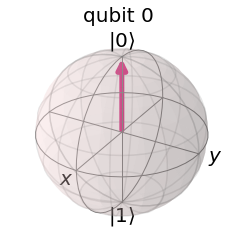

In [22]:
job = execute(circuit, backend_statevector) # by default it executes 1024 shots
plot_bloch_multivector(job.result().get_statevector(circuit))

Above is an handy representation of *pure quantum states*: a **Bloch sphere**. <br>
The Bloch sphere representation uses the fact that combining (or multiplying) a quantum state by itself doesn't change it. We can exploit this by normalising the state setting its $l_2$ to 1. <br>
This normalization reduces an otherwise 4-dimensional representation to 3 dimensions, which are represented in the Bloch sphere in an unusual way. 



The above experiment was completely deterministic, hence not interesting. <br> Let's increase the entropy of the state now.

In [0]:
import numpy as np

In [0]:
pi = np.pi

In [60]:
circuit = QuantumCircuit(q,c)
# we'll rotate the state by 90 degrees around the y axes 
# obtaining a superposition of two qubits 
circuit.ry(pi/2, q[0])

In [61]:
circuit.measure(q,c)

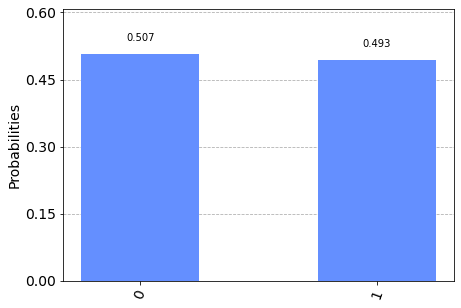

In [62]:
job = execute(circuit, backend, shots=10000)
plot_histogram(job.result().get_counts(circuit))

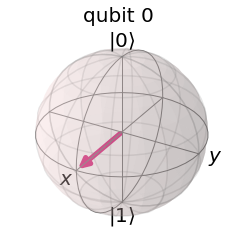

In [66]:
job = execute(circuit, backend_statevector, shots=10000)
plot_bloch_multivector(job.result().get_statevector(circuit))

In [67]:
# we now obtain another superposition by rotating around y 
# the 1-ket , which can be obtained by inserting a not gate on 
#the 0-ket
circuit = QuantumCircuit(q,c)
circuit.x(q[0]) # not gate 
circuit.ry(pi/2, q[0]) # rotation

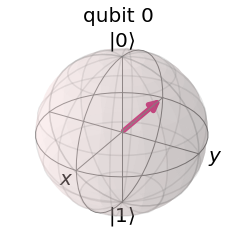

In [68]:
job=execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

Let's now look at the statistics of this second state: 

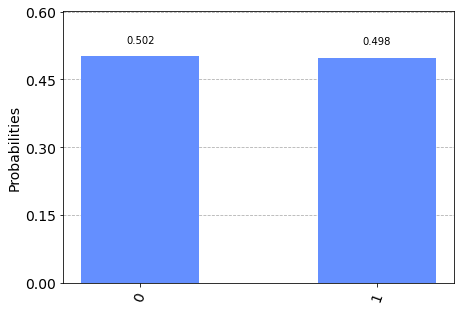

In [72]:
circuit.measure(q,c)
job = execute(circuit, backend, shots=10000)
plot_histogram(job.result().get_counts())

Notice that there's no difference between the last two states in terms of statistics. Indeed, the only difference is the sign of the amplitude of the 0 ket, which is not involved in its probability